In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

A01.1 Building and visualising networks

1.star network

In [3]:
# creat a star network
N=32
g1=nx.Graph()
g1.add_node(N-1)
for i in range(N-1):
    g1.add_node(i)
    g1.add_edge(N-1,i)

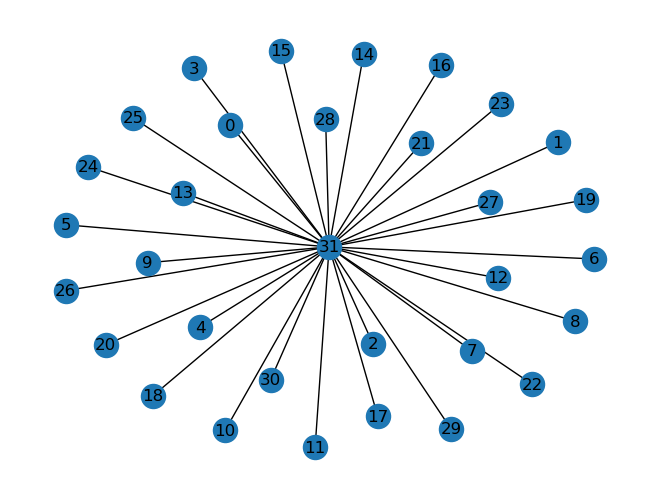

In [4]:
nx.draw(g1, with_labels=True)
plt.show()

2.fully connected network

In [5]:
# creat a fully connected network
g2=nx.Graph()
for i in range(N):
    g1.add_node(i)
for i in range(N-1):
    for j in range(i+1,N):
        g2.add_edge(i,j)

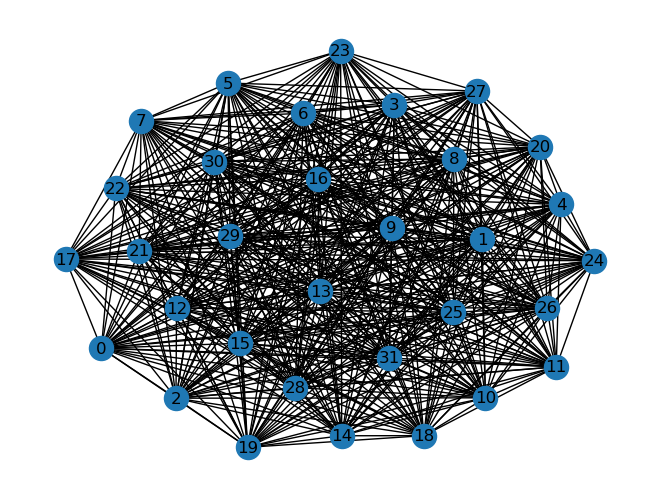

In [6]:
# visualize the fully connected network
nx.draw(g2, with_labels = True)
plt.show()

3.One-dimensional lattice

In [7]:
# creat a one-dimensional lattice network
g3=nx.Graph()
for i in range(N):
    g3.add_node(i)
for i in range(N-1):
    g3.add_edge(i,i+1)
g3.add_edge(N-1,0)

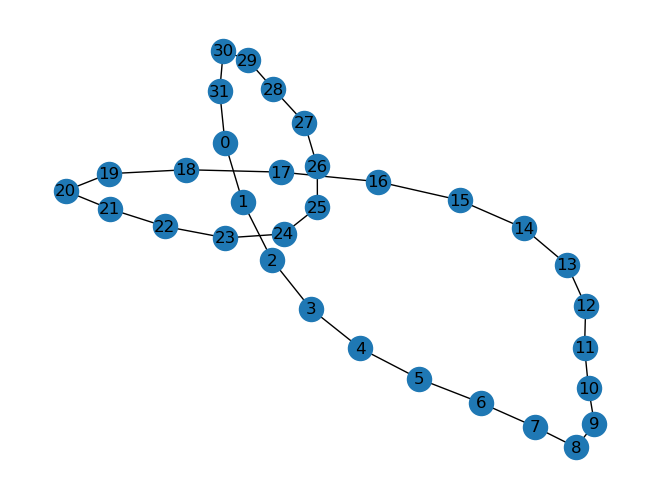

In [8]:
# visialize the one-dimensional lattice network
nx.draw(g3, with_labels=True)
plt.show()

A01.2a Global properties

1.average degree and density

function to calculate the average degree and the density

In [9]:
def func_degree(g):
    N=g.number_of_nodes()
    g_degree=g.degree()
    g_degrees=[g_degree[i] for i in g.nodes()]
    g_sum_degree=0
    for i in range (N):
        g_sum_degree+=g_degrees[i]
    ave=g_sum_degree/N
    den=2*g_sum_degree/(N*(N-1))
    return ave,den

In [10]:
# calculate the average degree and the density of the datasets given
# facebook
g_facebook = nx.read_gml("graph_facebook.gml")
[g_facebook_average,g_facebook_density]=func_degree(g_facebook)

In [11]:
g_facebook_average

43.69101262688784

In [12]:
g_facebook_density

0.021639927006878574

In [13]:
# karate
g_karate = nx.read_gml("graph_karate.gml")
[g_karate_average,g_karate_density]=func_degree(g_karate)

In [14]:
g_karate_average

4.588235294117647

In [15]:
g_karate_density

0.27807486631016043

In [16]:
# netsci
g_netsci = nx.read_gml("graph_netsci.gml")
[g_netsci_average,g_netsci_density]=func_degree(g_netsci)

In [17]:
g_netsci_average

3.753593429158111

In [18]:
g_netsci_density

0.005141908807065905

In [19]:
# star network
[g1_average,g1_density]=func_degree(g1)

In [20]:
g1_average

1.9375

In [21]:
g1_density

0.125

In [22]:
# fully connected network
[g2_average,g2_density]=func_degree(g2)

In [23]:
g2_average

31.0

In [24]:
g2_density

2.0

In [25]:
# one-dimensional lattice network
[g3_average,g3_density]=func_degree(g3)

In [26]:
g3_average

2.0

In [27]:
g3_density

0.12903225806451613

function max_degree

In [28]:
def max_degree(g):
    num=g.number_of_nodes()
    nodes=[i for i in g.nodes()]
    g_degree=g.degree()
    degree=[g_degree[i] for i in g.nodes()]
    gmax=max(degree)
    imax=[]
    for i in range(num):
        if degree[i]==gmax:
            imax.append(nodes[i])
    return imax, gmax

In [29]:
# max_degree of star network
g1_max=max_degree(g1)
g1_max

([31], 31)

In [30]:
# max_degree of fully connected network
g2_max=max_degree(g2)
g2_max

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 31)

In [31]:
# max_degree of one-demensional lattice network
g3_max=max_degree(g3)
g3_max

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 2)

In [32]:
#test it on datasets given
#facebook
g_facebook = nx.read_gml("graph_facebook.gml")
g_facebook_max=max_degree(g_facebook)
g_facebook_max

(['107'], 1045)

In [33]:
#karate
g_karate = nx.read_gml("graph_karate.gml")
g_karate_max=max_degree(g_karate)
g_karate_max

([33], 17)

In [34]:
#netsci
g_netsci = nx.read_gml("graph_netsci.gml")
g_netsci_max=max_degree(g_netsci)
g_netsci_max

(['33'], 34)

A01.2b Degree Distributions

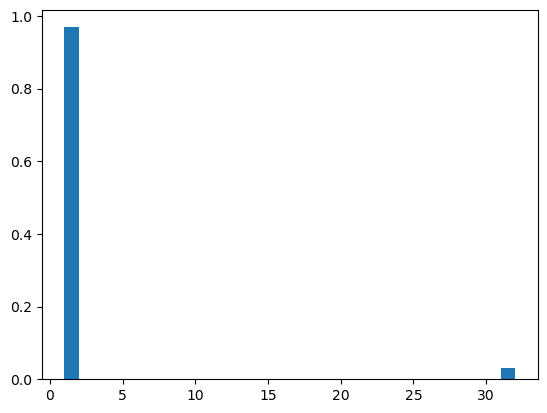

In [35]:
# degree distribution of star network
# lin-lin
g1_degree=g1.degree()
g1_degrees = [ g1_degree[i] for i in g1.nodes() ]
_ = plt.hist(g1_degrees, bins = [1,2,31,32], density = True)
plt.show()

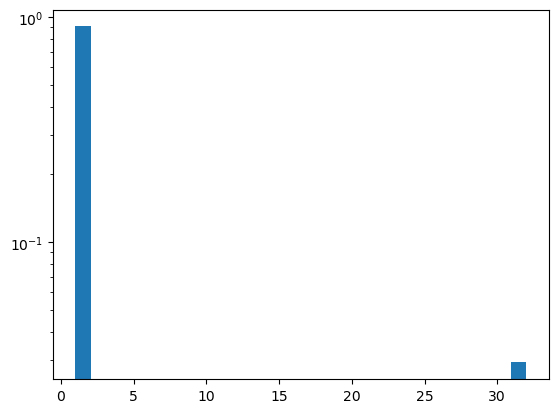

In [36]:
# lin-log
my_bins=np.linspace((min(g1_degrees)),(max(g1_degrees)+1),30)
_ = plt.hist(g1_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

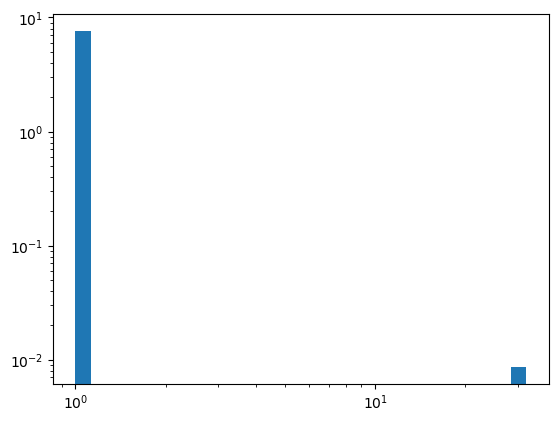

In [37]:
# log-log
my_bins = np.logspace(np.log10(min(g1_degrees)),np.log10(max(g1_degrees) +1),30) 
_ = plt.hist(g1_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [38]:
# to visualise better the distribution:
# we choose log-log for Star network:
# It is obvious that the number of the degree of nodes in star network is 2 or 31. 
# So if we choose a wide x axis range(lin), data distribution will inevitably be fragmented. 
# So we choose the interval(min(g1_degrees), max(g1_degrees)+1), but there are still a lot of blank spots between the two bar charts. 
# In the x-axis (log), the x-coordinate between 2 and 31 is only 10^1, Theoretically, x is more suitable for log type. 
# For the y-axis, when linearly distributed, p(2)=31/32≈1=10^(0);10^(-2)<p(31)=1/32<10^(-1), so compared with y(lin), y(log) will look more compact. 

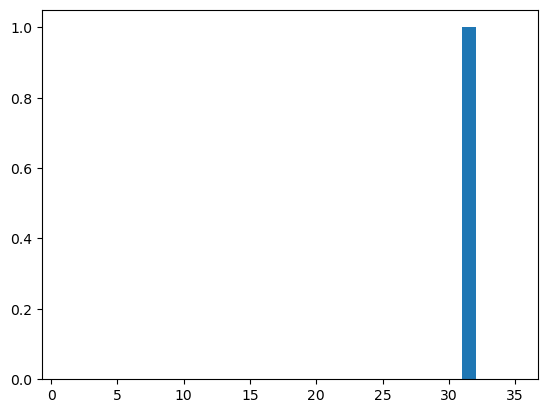

In [39]:
# degree distribution of fully connected network
# lin-lin
g2_degree=g2.degree()
g2_degrees = [ g2_degree[i] for i in g2.nodes() ]
_ = plt.hist(g2_degrees, bins = [1,31,32,35], density = True)
plt.show()

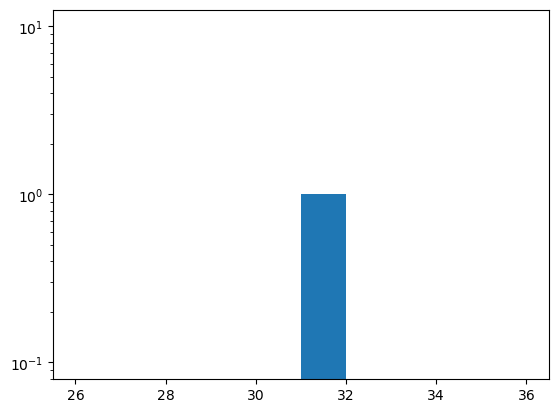

In [40]:
# lin- log
my_bins=np.linspace((min(g2_degrees)-5),(max(g2_degrees)+5),11)
_ = plt.hist(g2_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

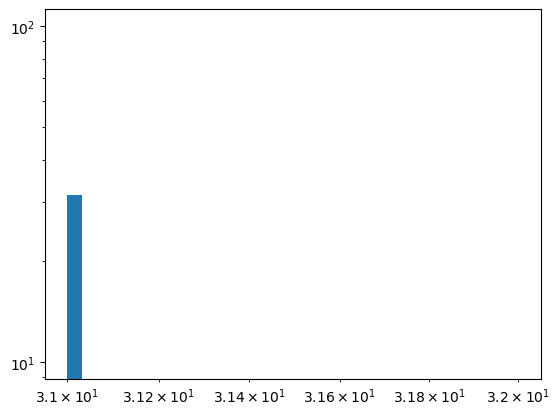

In [41]:
# log-log
my_bins = np.logspace(np.log10(min(g2_degrees)),np.log10(max(g2_degrees) +1), 32 ) 
_ = plt.hist(g2_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [42]:
# we choose lin-lin and lin-log for Fully connected
# All the degree in fully connected network is 31. 
# So actually we only one column. We can use (min(g2_degrees)-n, max(g2_degrees)+m) to reduce horizontal coordinate range. 
# In the lin-lin or lin-log type, the degree of all points can be seen very clearly. 
# While in the log-log type, it’s hard read the degree directly from the picture.  

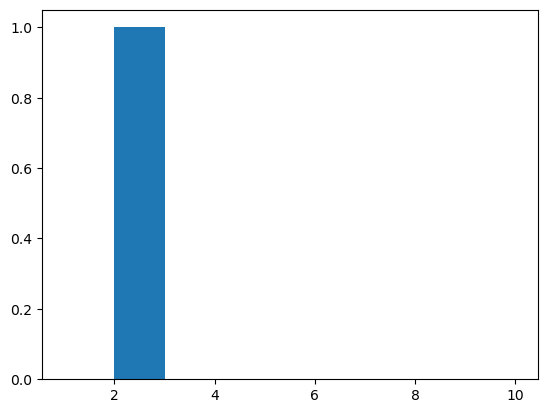

In [43]:
# degree distribution of a one-dimensional lattice network
# lin-lin
g3_degree=g3.degree()
g3_degrees = [ g3_degree[i] for i in g3.nodes() ]
_ = plt.hist(g3_degrees, bins = [1,2,3,10], density = True)
plt.show()

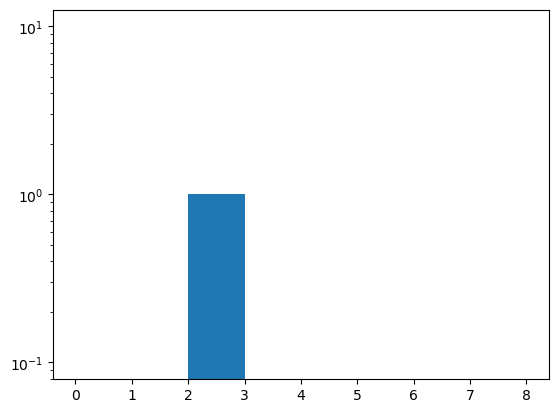

In [44]:
# lin-log
my_bins=np.linspace((min(g3_degrees))-2,(max(g3_degrees)+6),9)
_ = plt.hist(g3_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

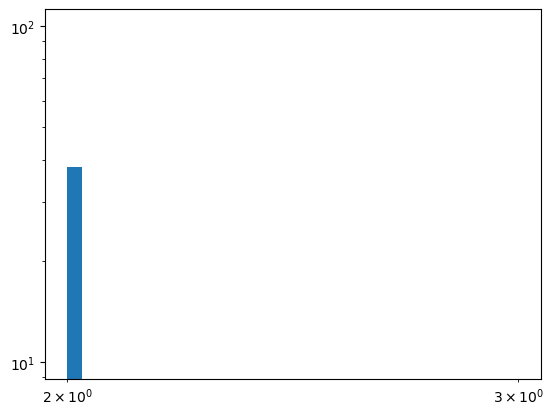

In [45]:
# log-log
my_bins = np.logspace(np.log10(min(g3_degrees)),np.log10(max(g3_degrees) +1), 32 ) 
_ = plt.hist(g3_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [46]:
# we choose lin-lin and lin-log for One-dimensional lattice
# All the degree in this network is 2, so it is only one column too. 
# We can use the (min(g2_degrees)-n, max(g2_degrees)+m) to find the degree in lin-lin or lin-log type. 
# While in the log-log type it’s hard to read the degree, we could only give the range.

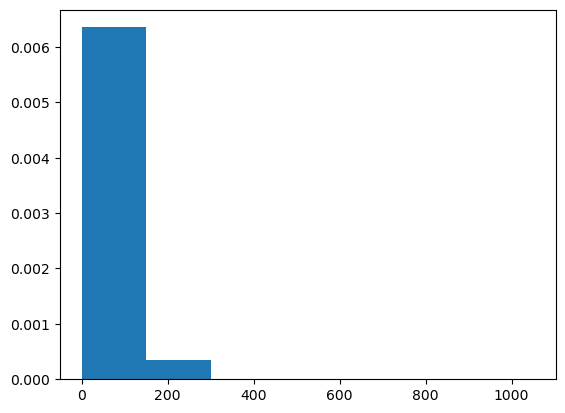

In [47]:
#datasets
#facebook
g_facebook_nodes = [i for i in g_facebook.nodes() ]
g_facebook_degrees = [g_facebook.degree(i) for i in g_facebook_nodes]
#lin-lin
_ = plt.hist(g_facebook_degrees, bins = [1,150,300,450,600,750,900,1050], density = True)
plt.show()

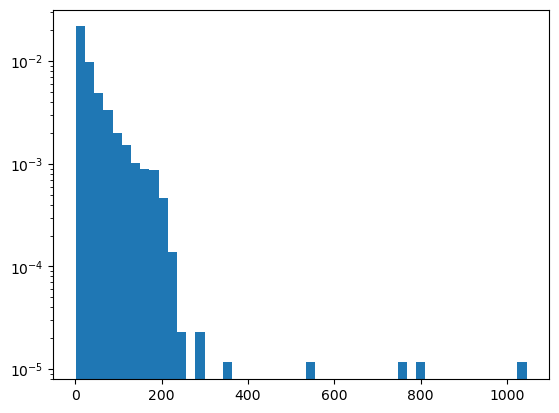

In [48]:
# lin-log
my_bins=np.linspace(1,(max(g_facebook_degrees)+1),50)
_ = plt.hist(g_facebook_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

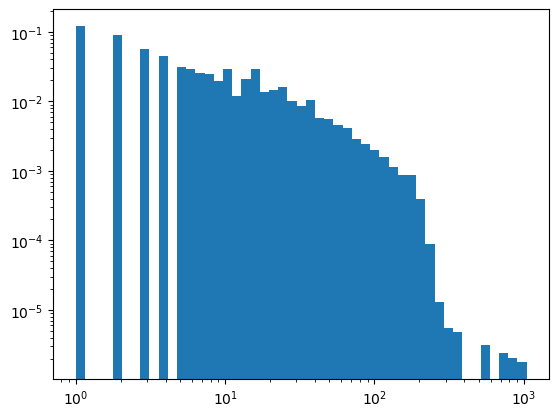

In [49]:
#log-log
my_bins = np.logspace(np.log10(1),np.log10(max(g_facebook_degrees) +1), 50 ) 
_ = plt.hist(g_facebook_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [50]:
#In the facebook dataset, the log-log type can see the distribution more clearly.

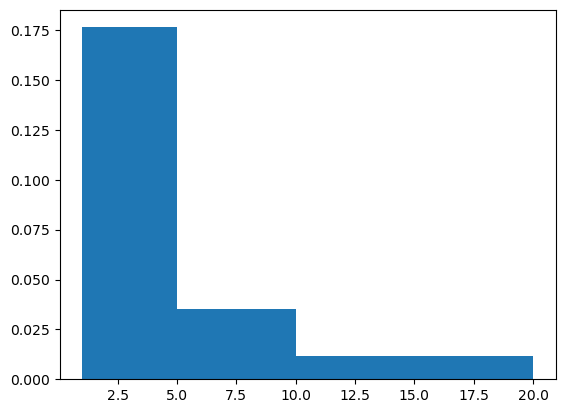

In [51]:
#datasets
#karate
g_karate_nodes = [i for i in g_karate.nodes() ]
g_karate_degrees = [g_karate.degree(i) for i in g_karate_nodes]
#lin-lin
_ = plt.hist(g_karate_degrees, bins = [1,5,10,15,20], density = True)
plt.show()

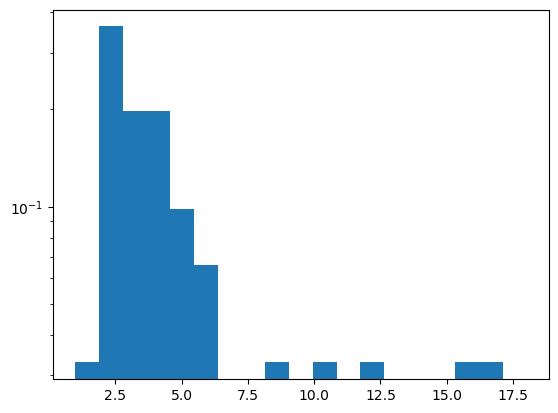

In [52]:
# lin-log
my_bins=np.linspace(1,(max(g_karate_degrees)+1),20)
_ = plt.hist(g_karate_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

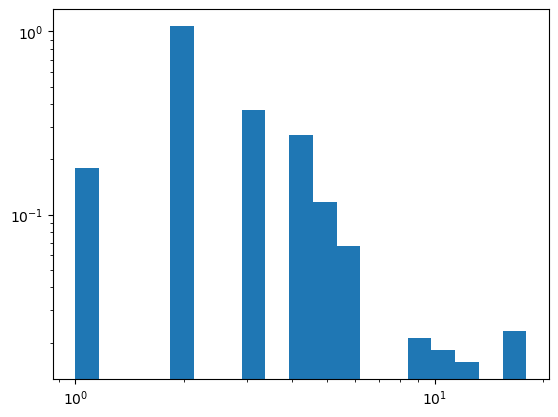

In [53]:
#log-log
my_bins = np.logspace(np.log10(1),np.log10(max(g_karate_degrees) +1), 20 ) 
_ = plt.hist(g_karate_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [54]:
#In the karate dataset, the log-log type can see the distribution more clearly.

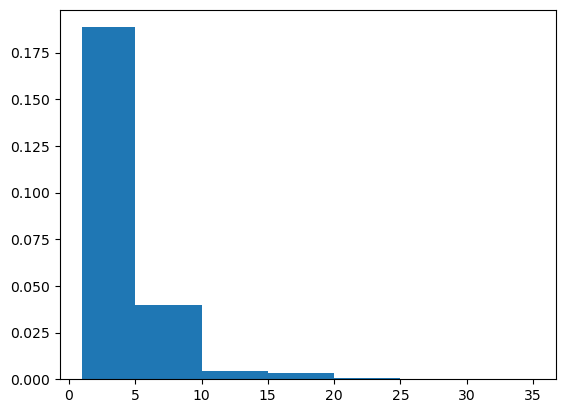

In [55]:
#datasets
#netsci
g_netsci_nodes = [i for i in g_netsci.nodes() ]
g_netsci_degrees = [g_netsci.degree(i) for i in g_netsci_nodes]
#lin-lin
_ = plt.hist(g_netsci_degrees, bins = [1,5,10,15,20,25,30,35], density = True)
plt.show()

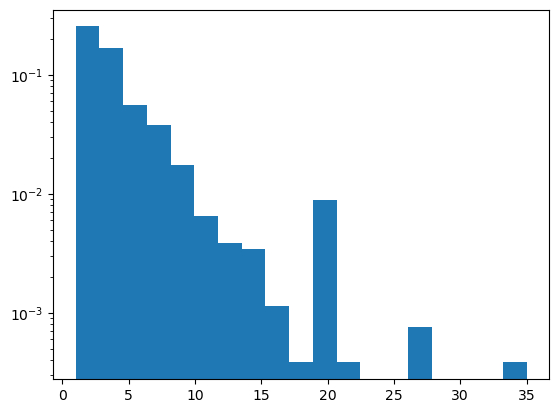

In [56]:
# lin-log
my_bins=np.linspace(1,(max(g_netsci_degrees)+1),20)
_ = plt.hist(g_netsci_degrees, bins = my_bins, density = True)
plt.yscale('log')
plt.show()

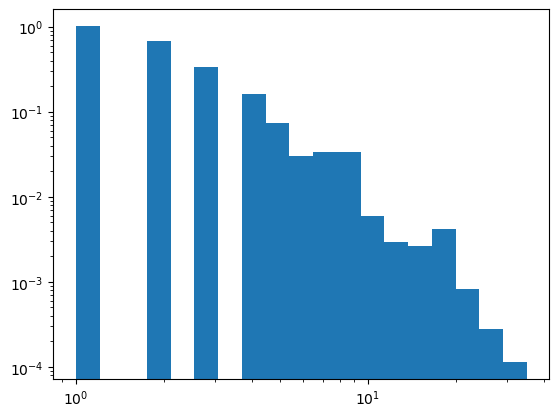

In [57]:
#log-log
my_bins = np.logspace(np.log10(1),np.log10(max(g_netsci_degrees) +1), 20 ) 
_ = plt.hist(g_netsci_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [58]:
#In the netsci dataset, the log-log type can see the distribution more clearly.

In [59]:
# In summary, we think that for a discrete distribution like network, when there are multiple columns, while the degree and the probability have significant differences. 
# When the degrees have significant differences, then it’s better to try x(log), when the probability has significant differences, try y(log). 
# In other situations lin-lin might be the best choice.